# Importing Requirements

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [34]:
path = "\\Users\\almit\\Downloads"
data_dir = os.path.join(path, 'Crowd Sourced Grocery Prices V2.xlsx')
data_output = os.path.join(path, 'Crowd Sourced Grocery Prices.xlsx')

In [6]:
df = pd.ExcelFile(data_dir)
df.sheet_names

['Observations', 'Products']

In [7]:
df_observation = pd.read_excel(data_dir, sheet_name='Observations',date_parser=True)

In [8]:
df_observation.head()

,Country,City,Obs Date,Product Code,Quantity,Price
0,Kenya,Eldoret,2009-01-01 00:00:00,52.0,1 kg,11.92
1,Pakistan,Attock,2009-01-01 00:00:00,44.0,1 kg,9.36
2,India,Nashik,2009-01-01 00:00:00,47.0,1 kg,6.47
3,Kenya,Eldoret,2009-01-01 00:00:00,52.0,1 kg,5.91
4,India,Nashik,2009-01-01 00:00:00,62.0,100 g,1.80


In [9]:
df_products=pd.read_excel(data_dir, sheet_name='Products')

In [10]:
df_products.head()

,Product Code,Product Name
0,11,"Rice, long grain"
1,12,"Rice, white"
2,13,"Cornflakes, Kellogg's"
3,14,"Flour, wheat"
4,15,"Flour, maize"


In [11]:
df_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961797 entries, 0 to 961796
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       961732 non-null  object 
 1   City          961732 non-null  object 
 2   Obs Date      961732 non-null  object 
 3   Product Code  961732 non-null  float64
 4   Quantity      961732 non-null  object 
 5   Price         931766 non-null  float64
dtypes: float64(2), object(4)
memory usage: 44.0+ MB


In [12]:
df_observation.isnull().sum()

Country            65
City               65
Obs Date           65
Product Code       65
Quantity           65
Price           30031
dtype: int64

In [13]:
df_observation.dropna(axis= 0,subset=['Country','City','Obs Date','Product Code','Quantity'],inplace=True)

In [14]:
df_observation.isnull().sum()

Country             0
City                0
Obs Date            0
Product Code        0
Quantity            0
Price           29966
dtype: int64

In [15]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Code  30 non-null     int64 
 1   Product Name  30 non-null     object
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [16]:
df_products.isnull().sum()

Product Code    0
Product Name    0
dtype: int64

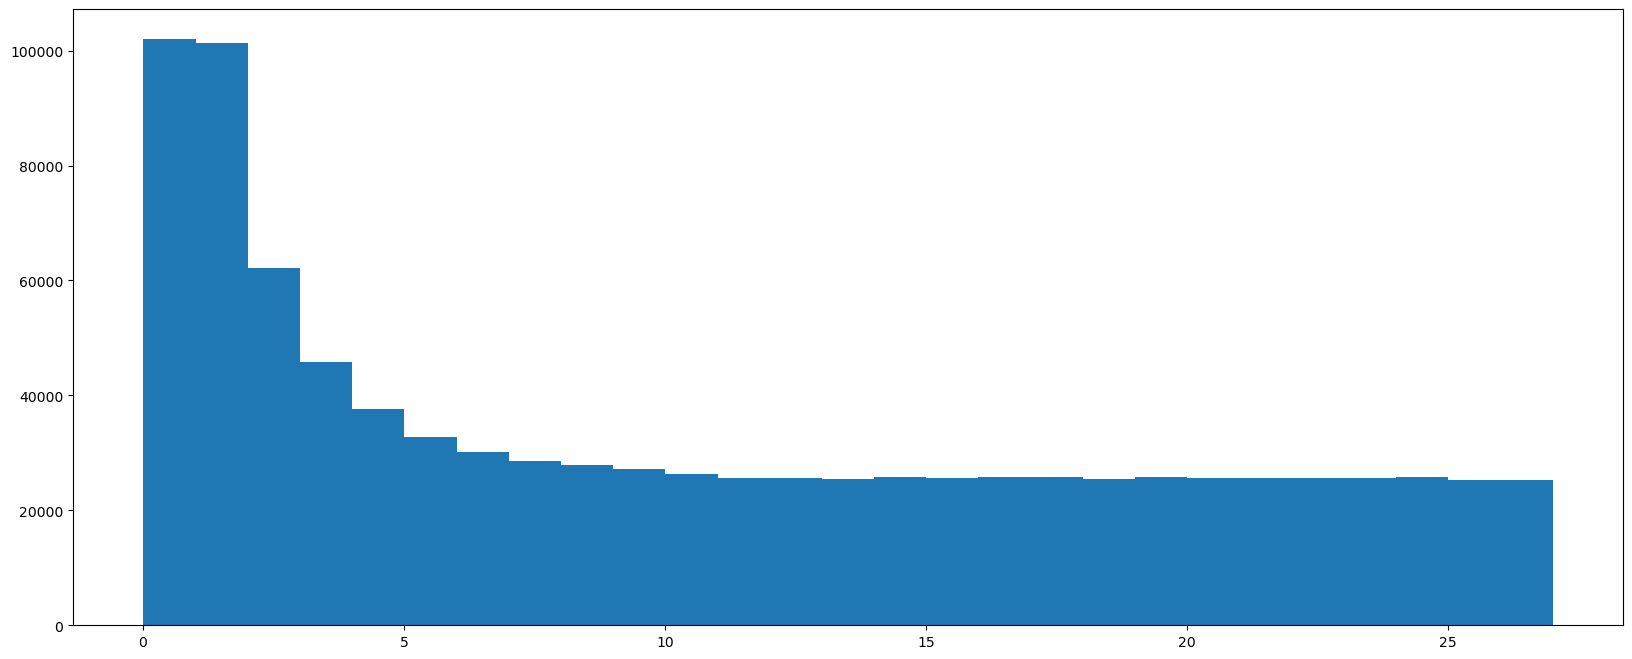

Mean - 10.563621484227882
Median -8.91


In [17]:
plt.figure(figsize = (20,8))
plt.hist(df_observation.Price,bins = 27)
plt.show()
print("Mean - " + str(df_observation.Price.mean()))
print("Median -" + str(df_observation.Price.median()))

In [18]:
df_observation.Price.fillna(df_observation.Price.median(),inplace=True)

In [19]:
df_observation.isna().sum()

Country         0
City            0
Obs Date        0
Product Code    0
Quantity        0
Price           0
dtype: int64

In [20]:
list(df_observation.Country.unique())

['Kenya',
 'Pakistan',
 'India',
 'Bangladesh',
 'Indonesia',
 'Nigeria',
 'Philippines',
 'Brazil',
 'Brazel',
 'Indonseia',
 'Phillippines']

In [21]:
df_observation.Country=df_observation.Country.map({'Kenya' : 'Kenya', 'Pakistan' : 'Pakistan', 'India' : 'India', 'Bangladesh' : 'Bangladesh', 'Indonesia' : 'Indonesia', 'Nigeria' : 'Nigeria', 'Philippines' : 'Philippines', 'Brazil' : 'Brazil', 'Brazel' : 'Brazil', 'Indonseia' : 'Indonesia', 'Phillippines' : 'Philippines'})

In [22]:
list(df_observation.Country.unique())

['Kenya',
 'Pakistan',
 'India',
 'Bangladesh',
 'Indonesia',
 'Nigeria',
 'Philippines',
 'Brazil']

In [23]:
df_observation.duplicated().sum()

14397

In [24]:
dfObj = pd.DataFrame(df_observation)

In [25]:
duplicateRowsDF = dfObj[dfObj.duplicated()]
print("Duplicate rows except first occurence based on all columns are :")
print(duplicateRowsDF)

Duplicate rows except first occurence based on all columns are :
           Country        City             Obs Date  Product Code Quantity  \
121       Pakistan    Sargodha  2009-01-20 00:00:00          44.0     1 kg   
127       Pakistan  Gujranwala  2009-01-20 00:00:00          44.0     1 kg   
130       Pakistan    Sargodha  2009-01-20 00:00:00          52.0     1 kg   
131       Pakistan  Gujranwala  2009-01-20 00:00:00          52.0     1 kg   
141       Pakistan     Karachi                39834          44.0     1 kg   
...            ...         ...                  ...           ...      ...   
961079     Nigeria       Abuja  2009-03-29 00:00:00          22.0     1 kg   
961146       Kenya     Nairobi  2009-04-22 00:00:00          23.0     1 kg   
961159       Kenya     Nairobi  2009-04-24 00:00:00          24.0     1 kg   
961424  Bangladesh       Dhaka  2009-04-06 00:00:00          24.0     1 kg   
961437  Bangladesh       Dhaka  2009-03-28 00:00:00          24.0     1 kg   

In [26]:
df_observation.drop_duplicates(subset = df_observation.columns, inplace = True)

In [27]:
df_observation.duplicated().sum()

0

# Merging Both Data Sets

In [28]:
df_full = pd.merge(df_observation,df_products,how='outer')

In [29]:
df_full.head()

,Country,City,Obs Date,Product Code,Quantity,Price,Product Name
0,Kenya,Eldoret,2009-01-01 00:00:00,52.0,1 kg,11.92,Cooking salt
1,Kenya,Eldoret,2009-01-01 00:00:00,52.0,1 kg,5.91,Cooking salt
2,Kenya,Eldoret,2009-01-02 00:00:00,52.0,1 kg,16.50,Cooking salt
3,Kenya,Eldoret,2009-01-02 00:00:00,52.0,1 kg,9.77,Cooking salt
4,Pakistan,Rawalpindi,2009-01-03 00:00:00,52.0,1 kg,17.80,Cooking salt


In [30]:
df_full.sort_values(by='Country', inplace= True)

In [31]:
df_full.head()

,Country,City,Obs Date,Product Code,Quantity,Price,Product Name
237535,Bangladesh,Dhaka,2012-04-16 00:00:00,14.0,1 kg,0.96193,"Flour, wheat"
256654,Bangladesh,Chittagong,2011-02-27 00:00:00,32.0,6 pc,6.75000,Eggs
692408,Bangladesh,Chittagong,2010-02-16 00:00:00,31.0,1 L,16.76000,Milk
692405,Bangladesh,Dhaka,2010-02-16 00:00:00,31.0,1 L,17.31000,Milk
692403,Bangladesh,Khulna,2010-02-16 00:00:00,31.0,1 L,17.59000,Milk


In [35]:
df_full.to_excel(data_output,columns=['Country','City','Obs Date','Product Code','Quantity','Price','Product Name'])